# Rs

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [78]:
Data=pd.read_csv('loan_prediction.csv')
Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Exploratory Data Analysis

In [79]:
Data.shape

(614, 13)

In [80]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [81]:
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Statistical Summary

In [82]:
Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [83]:
list1=['Gender','Married','Dependents','Self_Employed']
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
for i in list1:
    Data[i]=imp.fit_transform(Data[i].values.reshape(-1,1))
Data.isna().sum()    

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
list2=['LoanAmount','Loan_Amount_Term','Credit_History']
imp=SimpleImputer(strategy='mean')
for i in list2:
    Data[i]=imp.fit_transform(Data[i].values.reshape(-1,1))

Data.isna().sum()    

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
#In the loan_Prediction DataSet Loan_Status is the Target
Data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [86]:
#From the 614 Loan Applications 422 aproved and rest 192 are rejected
Data['Loan_Status']=Data['Loan_Status'].map({'Y':1,'N':0})
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [87]:
Data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

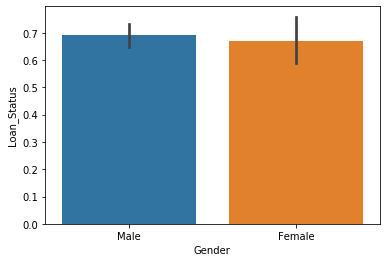

In [88]:
sns.barplot(x='Gender',y='Loan_Status',data=Data)

In [89]:
Data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

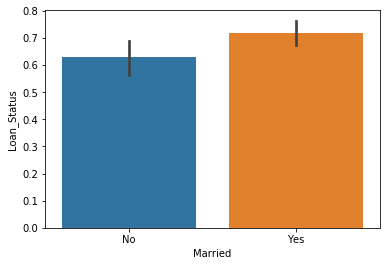

In [90]:
sns.barplot(x='Married',y='Loan_Status',data=Data)

In [91]:
Data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

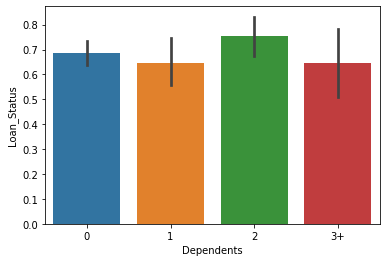

In [92]:
sns.barplot(x='Dependents',y='Loan_Status',data=Data)

In [93]:
Data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

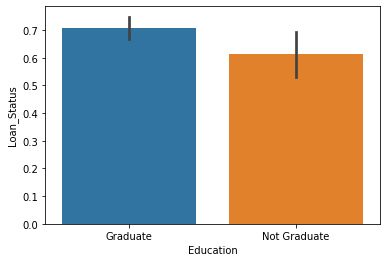

In [94]:
sns.barplot(x='Education',y='Loan_Status',data=Data)

In [95]:
Data.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

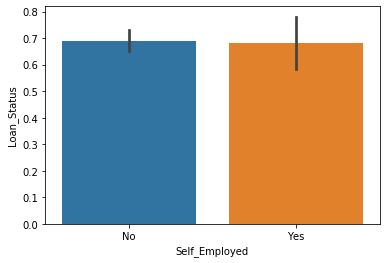

In [96]:
sns.barplot(x='Self_Employed',y='Loan_Status',data=Data)

In [97]:
Data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

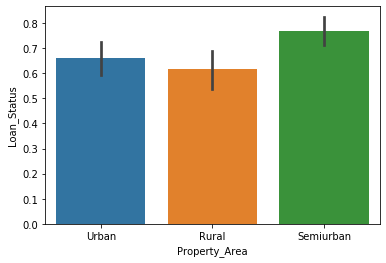

In [98]:
sns.barplot(x='Property_Area',y='Loan_Status',data=Data)

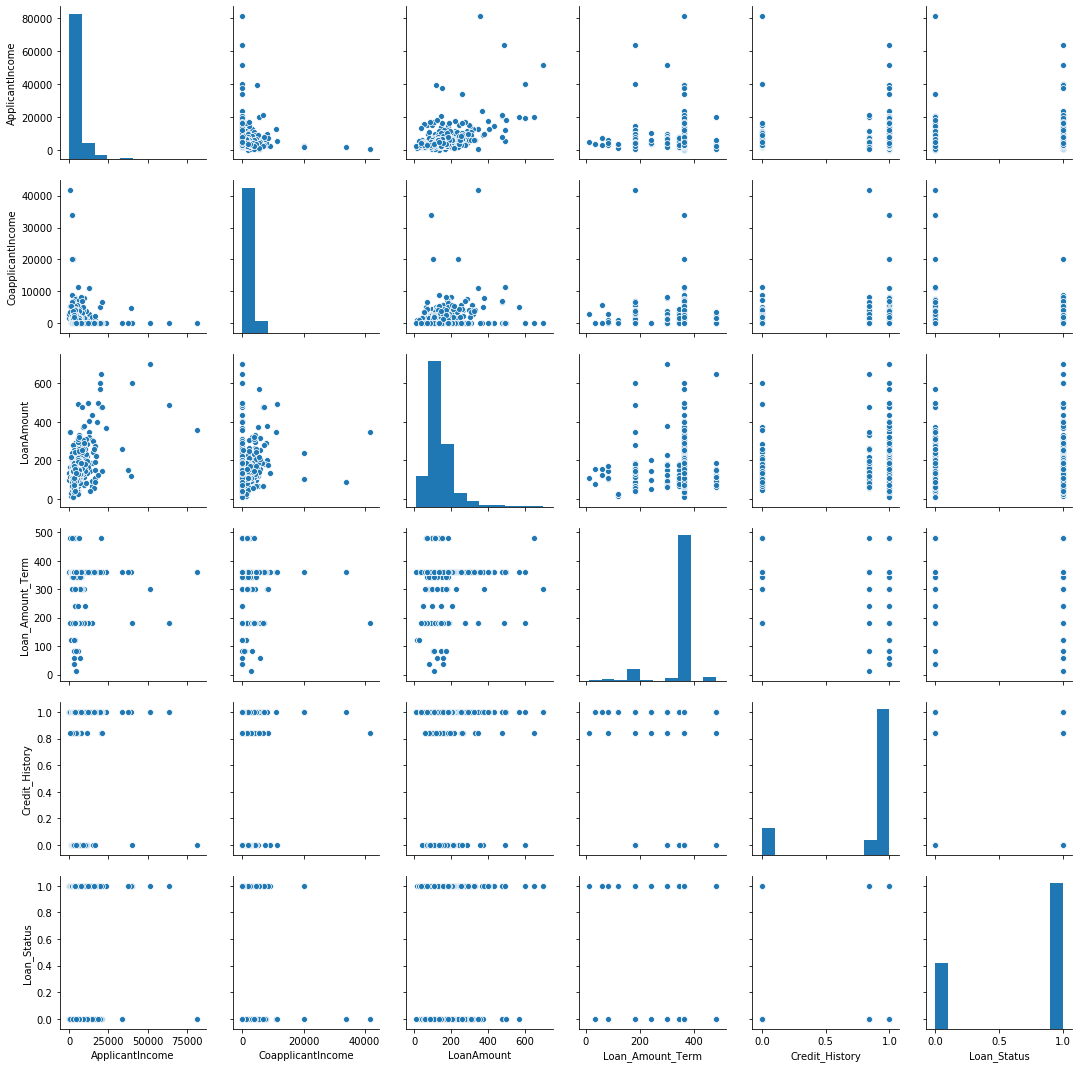

In [101]:
sns.pairplot(Data)

In [102]:
Data['Property_Area']=Data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,0,1


In [103]:
Data.Gender=Data.Gender.map({'Male':1,'Female':0})
Data.Married=Data.Married.map({'Yes':1,'No':0})
Data.Dependents=Data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
Data.Education=Data.Education.map({'Graduate':1,'Not Graduate':0})
Data.Self_Employed=Data.Self_Employed.map({'Yes':1,'No':0})
Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [104]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [105]:
#As Loan_ID has no effect on the model so we drop the column.
Data.drop(['Loan_ID'],axis=1,inplace=True)
Data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


Checking for Correlation

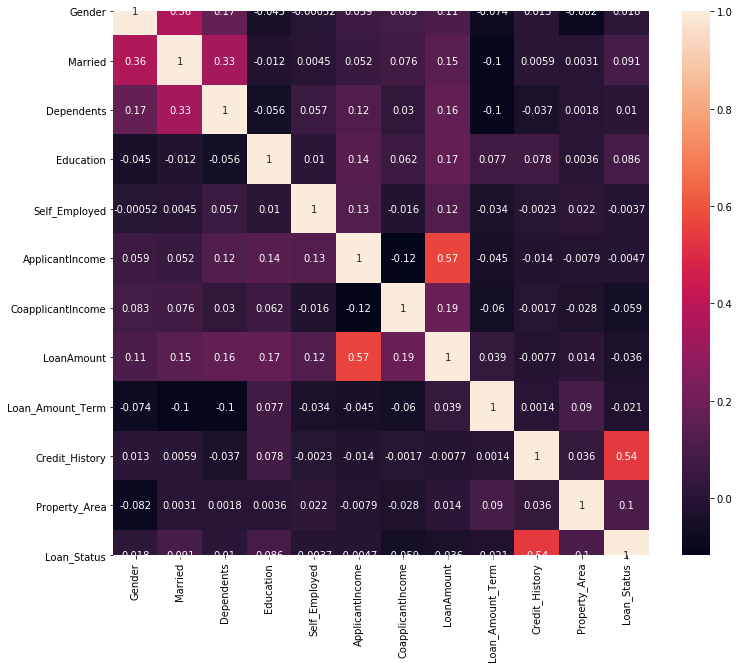

In [107]:
cor=Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

ApplicantIncome and LoanAmount are highly correlated with each other it means people with high Income applied for more Loan Amount.

Loan_Status and Credit_History are highly correlated with each other means peoples with More Credit_History The Chance of Approval is more.

Checking for Outliers

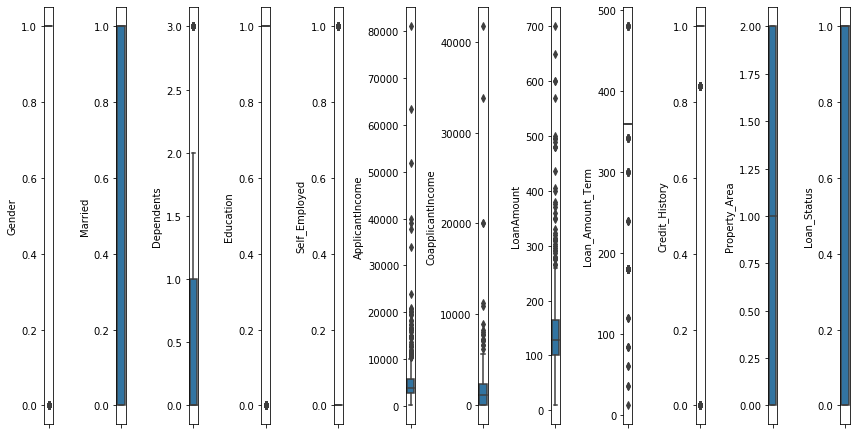

In [109]:
collist=Data.columns
ncol=12
nrow=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(Data[collist[i]],orient='v')
    plt.tight_layout()

Removing Outliers

In [110]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.45164045, 1.25029822,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 0.06009185,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.45164045, 1.25029822,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.25029822,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.45164045, 1.25029822,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.41044061, 1.13011452,
        1.48253724]])

In [111]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [112]:
print(Data.shape)
print(Data_new.shape)

(614, 12)
(577, 12)


Checking for Skewness

In [113]:
Data_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.091645
Loan_Status         -0.822635
dtype: float64

In [116]:
for i in Data_new.columns:
    Data_new[i]=np.sqrt(Data_new[i])

In [117]:
Data_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.456414
Credit_History      -1.960638
Property_Area       -0.500170
Loan_Status         -0.822635
dtype: float64

In [119]:
Data_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,1.0,0.0,76.478755,0.000000,12.100089,18.973666,1.0,0.000000,1.0
1,1.0,1.0,1.000000,1.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,1.000000,0.0
2,1.0,1.0,0.000000,1.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,0.000000,1.0
3,1.0,1.0,0.000000,0.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,0.000000,1.0
4,1.0,0.0,0.000000,1.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,1.0,0.0,53.851648,0.000000,8.426150,18.973666,1.0,1.000000,1.0
610,1.0,1.0,1.732051,1.0,0.0,64.078077,0.000000,6.324555,13.416408,1.0,1.000000,1.0
611,1.0,1.0,1.000000,1.0,0.0,89.844310,15.491933,15.905974,18.973666,1.0,0.000000,1.0
612,1.0,1.0,1.414214,1.0,0.0,87.080423,0.000000,13.674794,18.973666,1.0,0.000000,1.0


In [122]:
df_x=Data_new.iloc[:,0:-1]
df_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,1.0,0.0,76.478755,0.000000,12.100089,18.973666,1.0,0.000000
1,1.0,1.0,1.000000,1.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,1.000000
2,1.0,1.0,0.000000,1.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,0.000000
3,1.0,1.0,0.000000,0.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,0.000000
4,1.0,0.0,0.000000,1.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,1.0,0.0,53.851648,0.000000,8.426150,18.973666,1.0,1.000000
610,1.0,1.0,1.732051,1.0,0.0,64.078077,0.000000,6.324555,13.416408,1.0,1.000000
611,1.0,1.0,1.000000,1.0,0.0,89.844310,15.491933,15.905974,18.973666,1.0,0.000000
612,1.0,1.0,1.414214,1.0,0.0,87.080423,0.000000,13.674794,18.973666,1.0,0.000000


In [123]:
y=Data_new.iloc[:,-1]
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [124]:
#Using StandardScaler for scaling the training_Dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.790925,0.541961,-0.380580,0.573815,-1.048379,0.287444,0.254494,0.439007,-1.375461
1,0.477137,0.733939,0.712444,0.541961,-0.380580,0.108539,0.444242,-0.047549,0.254494,0.439007,0.285278
2,0.477137,0.733939,-0.790925,0.541961,2.627567,-0.576353,-1.048379,-1.406327,0.254494,0.439007,-1.375461
3,0.477137,0.733939,-0.790925,-1.845150,-0.380580,-0.785602,0.818090,-0.200590,0.254494,0.439007,-1.375461
4,0.477137,-1.362511,-0.790925,0.541961,-0.380580,0.625791,-1.048379,0.191277,0.254494,0.439007,-1.375461
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.790925,0.541961,-0.380580,-0.625134,-1.048379,-1.277630,0.254494,0.439007,0.285278
573,0.477137,0.733939,1.812987,0.541961,-0.380580,-0.083263,-1.048379,-2.172895,-3.336535,0.439007,0.285278
574,0.477137,0.733939,0.712444,0.541961,-0.380580,1.282019,-0.452917,1.908726,0.254494,0.439007,-1.375461
575,0.477137,0.733939,1.335160,0.541961,-0.380580,1.135569,-1.048379,0.958258,0.254494,0.439007,-1.375461


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LogisticRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    acc_scr=accuracy_score(pred,test_y)
    if acc_scr>max_acc_score:
        max_acc_score=acc_scr
        final_r_state=r_state
    print('Max accuracy score corresponding to ',final_r_state,' is ',max_acc_score)    

Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  42  is  0.8413793103448276
Max accuracy score corresponding to  52  is  0.8620689655172413
Max accuracy score corresponding to  52  is  0.8620689655172413
Max accuracy score corresponding to  52  is  0.8620689655172413
Max accuracy score corresponding to  52  is  0.8620689655172413
Max accuracy score corresponding to  52  is  0.8620689655172413
Max accuracy score corresponding to  52 

In [127]:
#Lets Check if the model is Overfitting or Underfitting.
a_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')
print(a_score)
print(np.mean(a_score))

[0.81034483 0.79310345 0.79310345 0.86086957 0.83333333]
0.8181509245377312


In [129]:
#Final LogisticRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=68,test_size=0.25)
lr=LogisticRegression()
lr.fit(train_x,train_y)
lrpred=lr.predict(test_x)
print('Predicted Loan_Status',lrpred)

Predicted Loan_Status [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [131]:
print('Accuracy Score',accuracy_score(lrpred,test_y))
print('Confusion Matrix \n',confusion_matrix(lrpred,test_y))
print('Classification Report \n',classification_report(lrpred,test_y))

Accuracy Score 0.8896551724137931
Confusion Matrix 
 [[ 22   4]
 [ 12 107]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.65      0.85      0.73        26
         1.0       0.96      0.90      0.93       119

    accuracy                           0.89       145
   macro avg       0.81      0.87      0.83       145
weighted avg       0.91      0.89      0.90       145



In [133]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
gnbpred=gnb.predict(test_x)
print('Predicted Loan_Status: ',gnbpred)
print('Accuracy score: ',accuracy_score(gnbpred,test_y))

Predicted Loan_Status:  [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
Accuracy score:  0.8827586206896552


In [137]:
from sklearn.svm import SVC
sv=SVC()
parameter={'kernel':['rbf','poly','linear']}
gd_sc=GridSearchCV(estimator=sv,param_grid=parameter,scoring='accuracy',cv=5)
gd_sc.fit(train_x,train_y)
best_parameter=gd_sc.best_params_
print(best_parameter)
best_score=gd_sc.best_score_
print(best_score)

{'kernel': 'rbf'}
0.7986111111111112


In [139]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameter={'criterion':['gini','entropy']}
gd_sc=GridSearchCV(estimator=dt,param_grid=parameter,scoring='accuracy',cv=5)
gd_sc.fit(train_x,train_y)
best_parameter=gd_sc.best_params_
print(best_parameter)
best_score=gd_sc.best_score_
print(best_score)

{'criterion': 'entropy'}
0.7175925925925926


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameter={'n_neighbors':[100,200,300]}
gd_sc=GridSearchCV(estimator=knn,param_grid=parameter,scoring='accuracy',cv=5)
gd_sc.fit(train_x,train_y)
best_parameter=gd_sc.best_params_
print(best_parameter)
best_score=gd_sc.best_score_
print(best_score)

{'n_neighbors': 100}
0.6759259259259259


In [148]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
grid_param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_result=gd_sr.best_score_
print(best_result)

{'n_estimators': 300}
0.7989601386481803


In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'n_estimators':[100,200,300,400]}
gd_sc=GridSearchCV(estimator=gbc,param_grid=parameters,scoring='accuracy',cv=5)
gd_sc.fit(train_x,train_y)
best_parameter=gd_sc.best_params_
print(best_parameter)
best_score=gd_sc.best_score_
print(best_score)

{'n_estimators': 100}
0.7615740740740741


In [153]:
test1=np.array([1,1,3,2,1,785,23,323,22,1,12]).reshape(1,-1)
lr.predict(test1)

array([0.])

In [154]:
test2=np.array([1,1,3,2,1,785,23,33,22,1,12]).reshape(1,-1)
lr.predict(test2)

array([1.])

In [155]:
#Saving the Prediction
df=pd.DataFrame(lrpred)
df.to_csv('Loan_prediction.csv')

In [156]:
#Saving the model for Production
from sklearn.externals import joblib
joblib.dump(lrpred,'Loan_prediction.obj')

['Loan_prediction.obj']